# K-means VS Agrupamiento Jerarquico

/tmp/ipython-input-31-3605857871.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_handles = [plt.scatter([], [], c=plt.cm.viridis(i/max(unique_labels)), label=label)


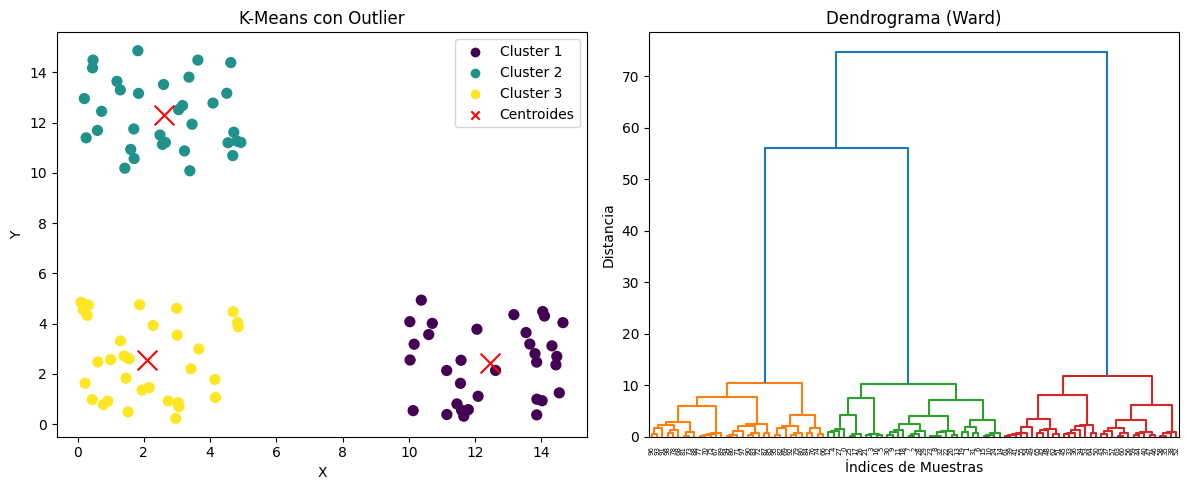

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Generar datos de ejemplo
np.random.seed(42)  # Para reproducibilidad

n = 99  # N puntos

# Tres grupos pequeños
group1 = np.random.rand(n//3, 2) * 5
group2 = np.random.rand(n//3, 2) * 5 + [10, 0]  # Desplazado en x
group3 = np.random.rand(n//3, 2) * 5 + [0, 10]   # Desplazado en y

# Punto outlier
#outlier = np.array([[50, 10]])


# Combinar todos los datos
data = np.concatenate([group1, group2, group3])

# --- K-Means ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init se establece explícitamente
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# --- Agrupamiento Jerárquico ---
linked = linkage(data, 'ward')  # Usar el método de Ward

# --- Preparar el gráfico ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas más ancho

# --- Graficar K-Means ---
scatter = axes[0].scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
axes[0].scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='red', label='Centroides')
axes[0].set_title('K-Means con Outlier')
axes[0].legend()
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Añadir leyenda de colores para los clusters
unique_labels = np.unique(labels)
legend_labels = [f'Cluster {i+1}' for i in unique_labels]
legend_handles = [plt.scatter([], [], c=plt.cm.viridis(i/max(unique_labels)), label=label)
                  for i, label in zip(unique_labels, legend_labels)]
axes[0].legend(handles=legend_handles +
               [plt.scatter([], [], marker='x', color='red', label='Centroides')],
               loc='best')

# --- Graficar Dendrograma ---
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            ax=axes[1])  # Graficar en el segundo subplot (axes[1])
axes[1].set_title('Dendrograma (Ward)')
axes[1].set_xlabel('Índices de Muestras')
axes[1].set_ylabel('Distancia')

plt.tight_layout()  # Ajustar automáticamente los subplots
plt.show()

In [32]:
# Imprimir información adicional

print("Centroides de K-Means:")
for i, centroid in enumerate(centroids):
    print(f"Centroide {i}: {centroid}")

print("\nDistancias en el Linkage:")
for i, link in enumerate(linked):
    print(f"Enlace {i}: {link}")

Centroides de K-Means:
Centroide 0: [12.45280449  2.41940906]
Centroide 1: [ 2.59759021 12.29005847]
Centroide 2: [2.10374282 2.5506805 ]

Distancias en el Linkage:
Enlace 0: [ 8.         23.          0.04409214  2.        ]
Enlace 1: [86.         94.          0.11662859  2.        ]
Enlace 2: [70.         77.          0.12579761  2.        ]
Enlace 3: [10.         15.          0.15663943  2.        ]
Enlace 4: [17.         25.          0.16749266  2.        ]
Enlace 5: [35.         58.          0.16846304  2.        ]
Enlace 6: [60.         63.          0.18454015  2.        ]
Enlace 7: [2.        7.        0.1882335 2.       ]
Enlace 8: [32.         99.          0.19516768  3.        ]
Enlace 9: [73.         81.          0.20430749  2.        ]
Enlace 10: [39.         61.          0.20439135  2.        ]
Enlace 11: [ 9.         30.          0.23808166  2.        ]
Enlace 12: [ 5.         16.          0.24593417  2.        ]
Enlace 13: [ 3.         21.          0.24611401  2.        ]

# ¿Cuál es el efecto de cambiar la función de distancia en un dendrograma?

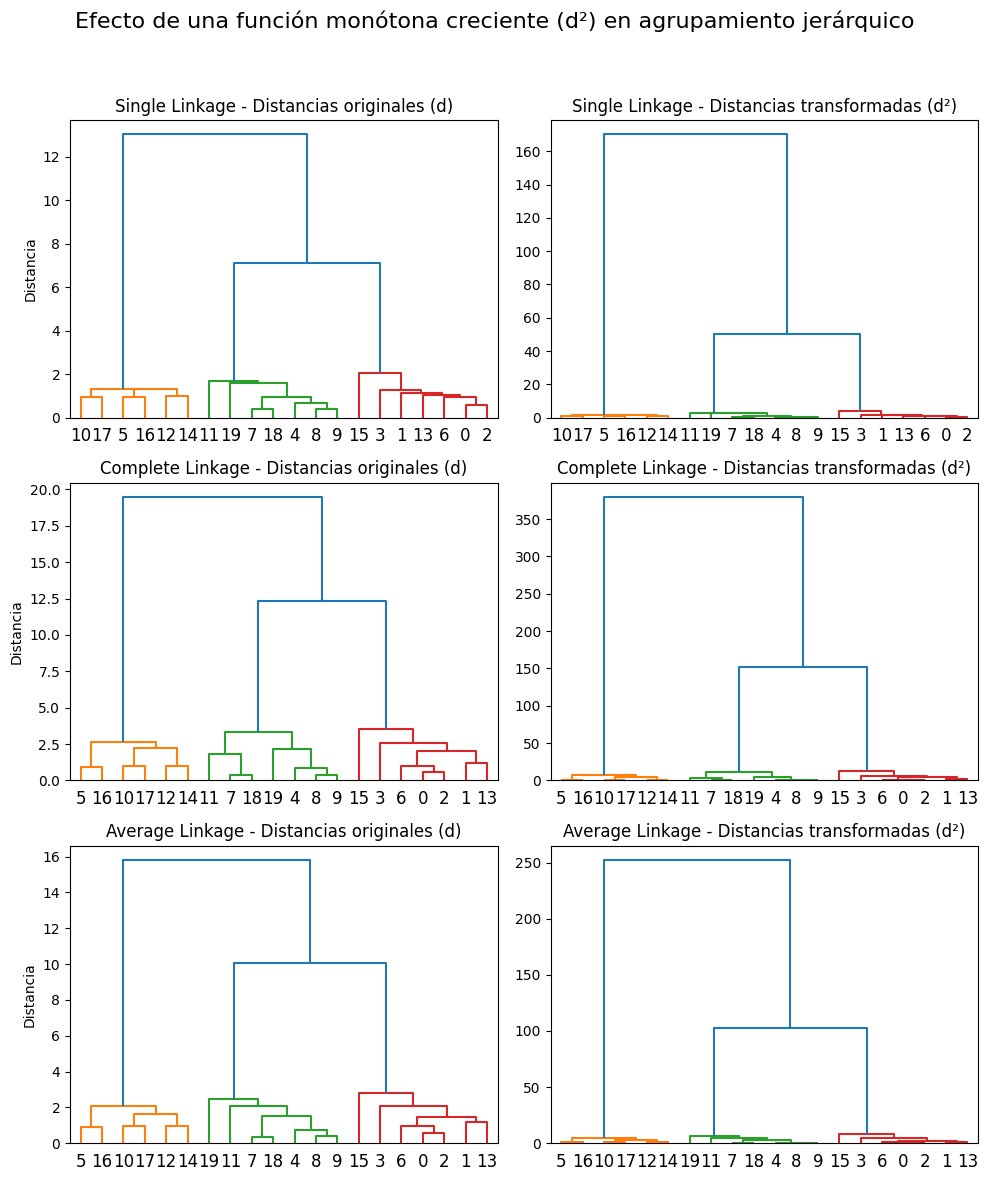

In [34]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
X, _ = make_blobs(n_samples=20, centers=3, random_state=42)

# Calculate original pairwise distances
original_distances = pdist(X)

# Apply monotonic transformation: square the distances
transformed_distances = original_distances ** 2

# Perform hierarchical clustering with different linkage methods
methods = ['single', 'complete', 'average']
titles = ['Single Linkage', 'Complete Linkage', 'Average Linkage']

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle('Efecto de una función monótona creciente (d²) en agrupamiento jerárquico', fontsize=16, y=0.98)

# Plot dendrograms for each method with original and transformed distances
for i, method in enumerate(methods):
    # Original distances
    Z_original = linkage(original_distances, method=method)
    ax1 = axes[i, 0]
    dendrogram(Z_original, ax=ax1, color_threshold=5)
    ax1.set_title(f'{titles[i]} - Distancias originales (d)')
    ax1.set_ylabel('Distancia')


    # Transformed distances
    Z_transformed = linkage(transformed_distances, method=method)
    ax2 = axes[i, 1]
    dendrogram(Z_transformed, ax=ax2, color_threshold=25)  # Adjusted threshold for squared distances
    ax2.set_title(f'{titles[i]} - Distancias transformadas (d²)')

# Add a scatter plot of the original data at the bottom
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Analisis de pruebas psicométricas SAT de 700 personas

Las pruebas psicométricas ACT, SATV y SATQ son exámenes estandarizados que se utilizan para evaluar diferentes habilidades y aptitudes en los estudiantes. A continuación, te explico de qué trata cada una:

*   **ACT (American College Testing)**: Es una prueba que mide los conocimientos y habilidades en cuatro áreas académicas principales: inglés, matemáticas, lectura y razonamiento científico. Algunas universidades en los Estados Unidos y otros países la utilizan como uno de los criterios de admisión.

*   **SATV (Scholastic Aptitude Test - Verbal)**: Esta prueba, que forma parte del SAT, evalúa las habilidades de razonamiento verbal. Mide la comprensión lectora, el vocabulario y la capacidad de analizar y sintetizar información presentada en forma de texto.

*   **SATQ (Scholastic Aptitude Test - Quantitative)**: También parte del SAT, esta prueba evalúa las habilidades de razonamiento cuantitativo o matemático. Mide la capacidad para resolver problemas, interpretar datos y aplicar conceptos matemáticos en diferentes contextos.


In [35]:
# Preprocesamiento
df = pd.read_csv('sat.csv').iloc[:, 1:]  # Eliminar columna ID
df['SATQ'] = df['SATQ'].fillna(df['SATQ'].mean())  # Imputar 3 NA

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [36]:
# Cargar los datos
df = pd.read_csv('sat.csv')

# Examinar las primeras filas
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())


Primeras filas del dataset:
   Unnamed: 0  gender  education  age  ACT  SATV   SATQ
0       29442       2          3   19   24   500  500.0
1       29457       2          3   23   35   600  500.0
2       29498       2          3   20   21   480  470.0
3       29503       1          4   27   26   550  520.0
4       29504       1          2   33   31   600  550.0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   gender      700 non-null    int64  
 2   education   700 non-null    int64  
 3   age         700 non-null    int64  
 4   ACT         700 non-null    int64  
 5   SATV        700 non-null    int64  
 6   SATQ        687 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 38.4 KB
None

Estadísticas descriptivas:
         Unnamed: 0      gender   education         a

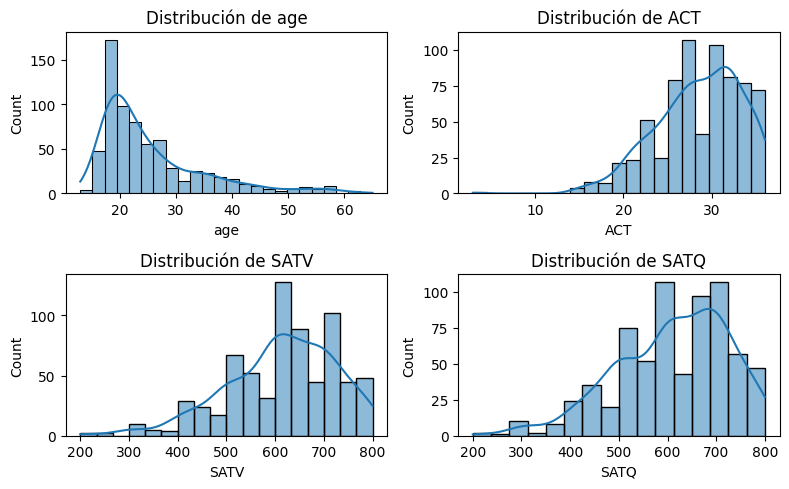

In [37]:
# Visualizar la distribución de las variables numéricas de SAT
plt.figure(figsize=(8, 5))
for i, col in enumerate(['age', 'ACT', 'SATV', 'SATQ']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

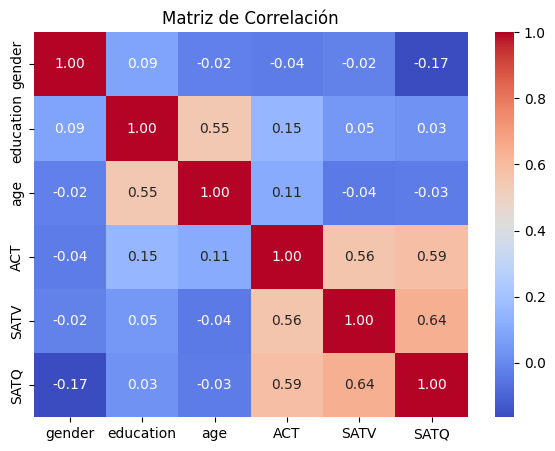

In [38]:
# Matriz de correlación
plt.figure(figsize=(7, 5))
corr = df[['gender', 'education', 'age', 'ACT', 'SATV', 'SATQ']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

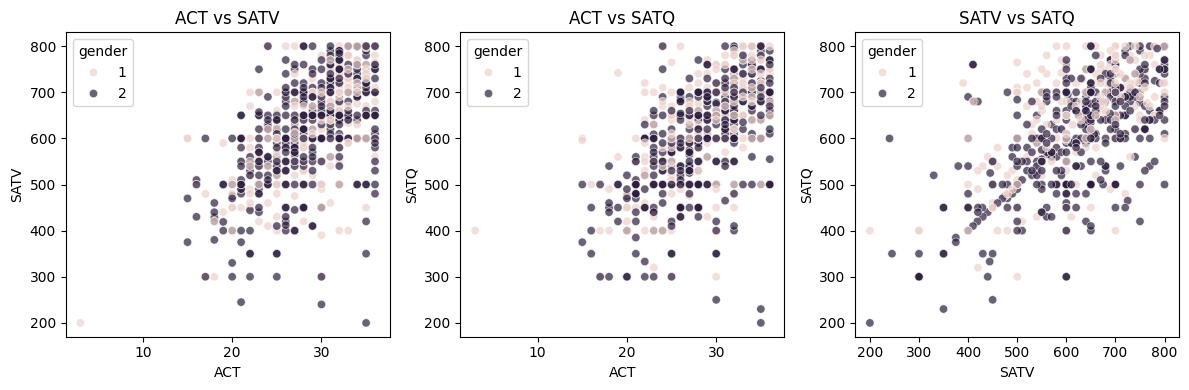

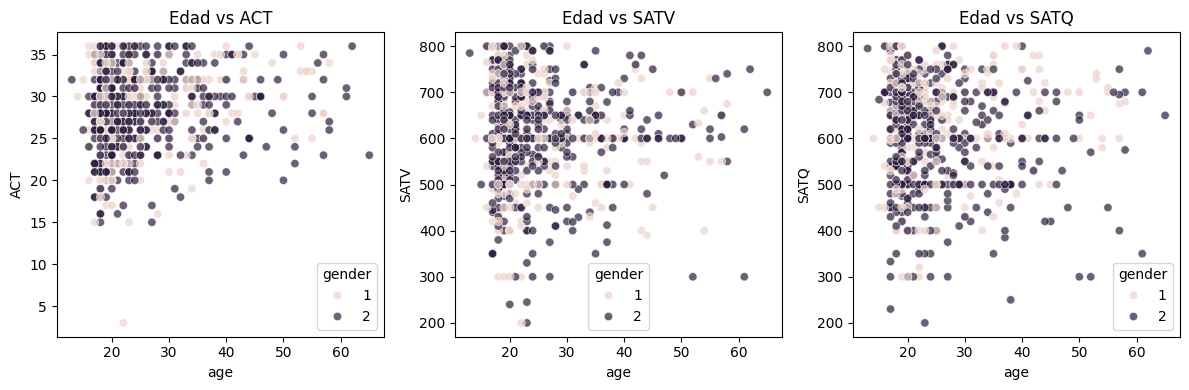

In [48]:
# Visualizar la relación entre las puntuaciones de los exámenes
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='ACT', y='SATV', data=df, hue='gender', alpha=0.7)
plt.title('ACT vs SATV')

plt.subplot(1, 3, 2)
sns.scatterplot(x='ACT', y='SATQ', data=df, hue='gender', alpha=0.7)
plt.title('ACT vs SATQ')

plt.subplot(1, 3, 3)
sns.scatterplot(x='SATV', y='SATQ', data=df, hue='gender', alpha=0.7)
plt.title('SATV vs SATQ')
plt.tight_layout()
plt.show()

# Relación entre edad y puntuaciones
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='ACT', data=df, hue='gender', alpha=0.7)
plt.title('Edad vs ACT')

plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='SATV', data=df, hue='gender', alpha=0.7)
plt.title('Edad vs SATV')

plt.subplot(1, 3, 3)
sns.scatterplot(x='age', y='SATQ', data=df, hue='gender', alpha=0.7)
plt.title('Edad vs SATQ')
plt.tight_layout()
plt.show()

El análisis anterior nos sugiere que hay 3 variable lo suficientemente independienteindependientes como para brindarnos la mayor parte de la información del conjunto de datos.
Así que ahora precedeprecederemos a obtener 3 componentes principales de PCA.


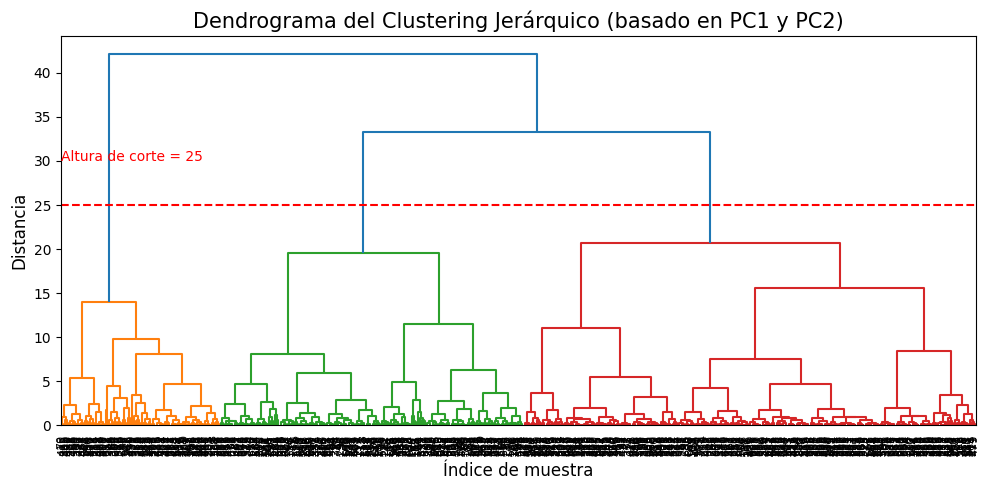

In [51]:
# Cargar y preparar los datos
df = pd.read_csv('sat.csv')
df.columns = [col.replace('"', '') for col in df.columns]
df = df.iloc[:, 1:]  # Eliminar la columna de índice
df['SATQ'] = df['SATQ'].fillna(df['SATQ'].mean())  # Imputar valores faltantes

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicar PCA para reducir a 2 dimensiones (solo PC1 y PC2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)

# Realizar clustering jerárquico usando solo PC1 y PC2
Z = linkage(principal_components, method='ward')

# Visualizar el dendrograma para verificar la altura de corte
plt.figure(figsize=(10, 5))
plt.title('Dendrograma del Clustering Jerárquico (basado en PC1 y PC2)', fontsize=15)
plt.xlabel('Índice de muestra', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)

# Dibujar una línea horizontal en la altura de corte
altura_corte = 25
plt.axhline(y=altura_corte, color='r', linestyle='--')
plt.text(0, altura_corte + 5, f'Altura de corte = {altura_corte}', color='r')

plt.tight_layout()
plt.show()



Número de clusters identificados en el dendrograma: 3
Número de puntos en cada cluster jerárquico:
1    122
2    232
3    346
Name: count, dtype: int64

Número de puntos en cada cluster de K-means:
1    218
2    195
3    287
Name: count, dtype: int64


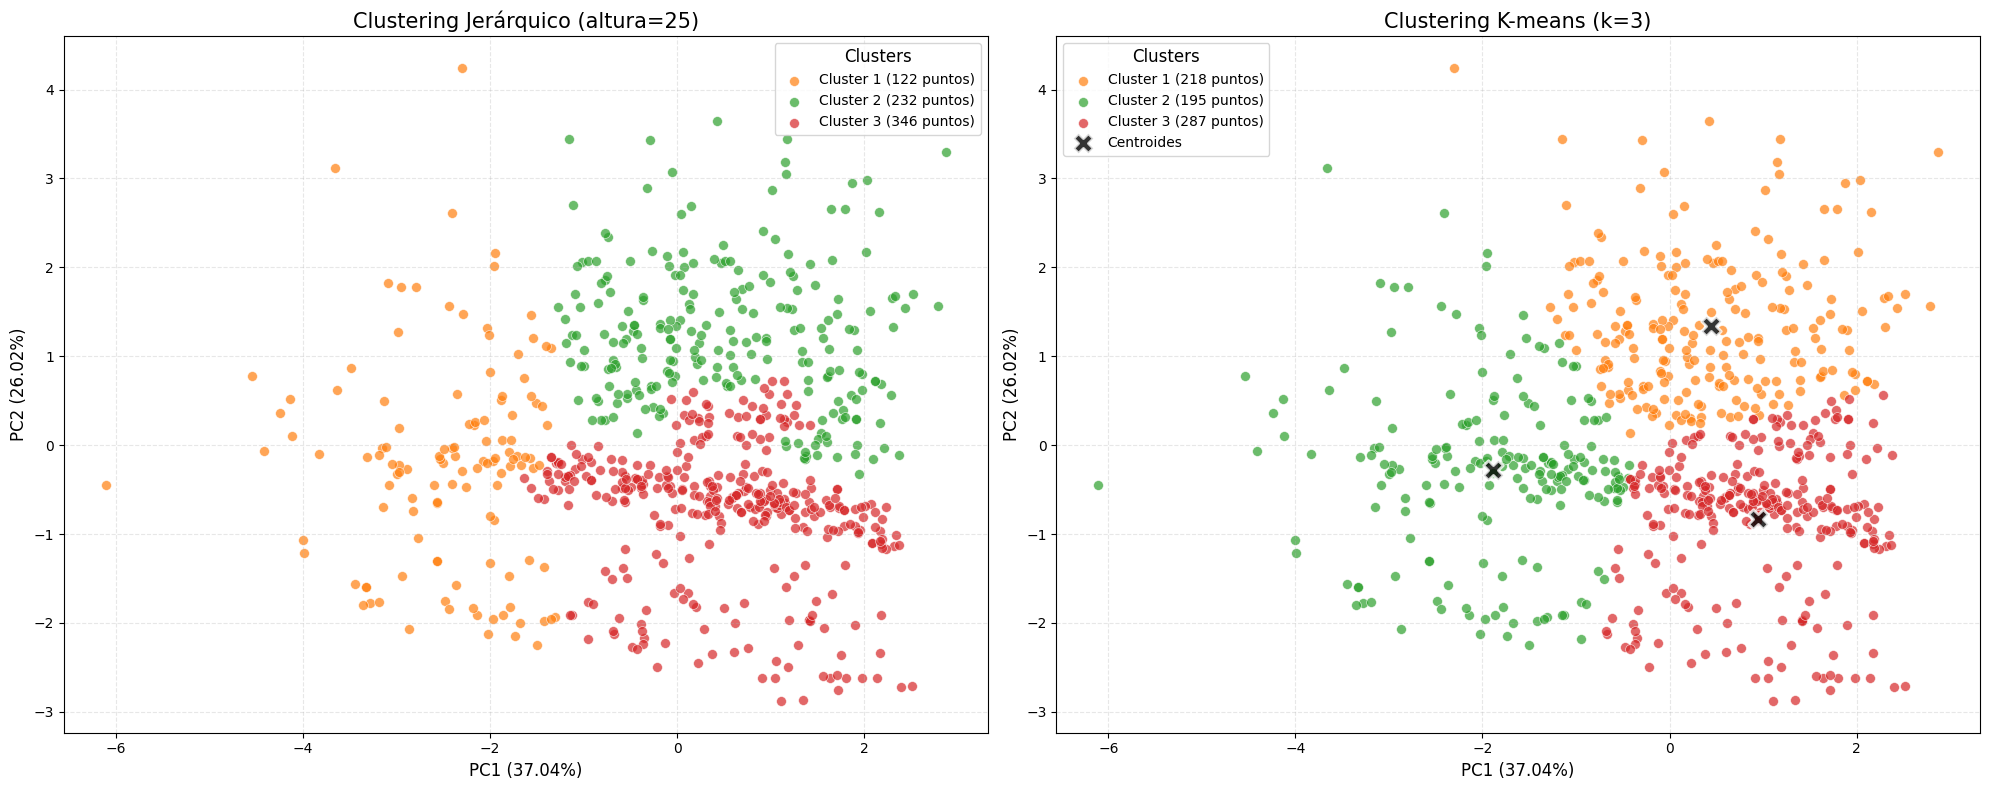

In [54]:

# Determinar clusters basados en el dendrograma
clusters_jerarquico = fcluster(Z, altura_corte, criterion='distance')

# Verificar el número de clusters identificados
num_clusters = len(np.unique(clusters_jerarquico))
print(f"Número de clusters identificados en el dendrograma: {num_clusters}")

# Añadir la información de clusters jerárquicos al dataframe de PCA
pca_df['ClusterDen'] = clusters_jerarquico

# Mostrar cuántos puntos hay en cada cluster jerárquico
print("Número de puntos en cada cluster jerárquico:")
print(pd.Series(clusters_jerarquico).value_counts().sort_index())

# Aplicar K-means con k=3 (basado en los clusters encontrados en el dendrograma)
k = 3  # Número de clusters identificados en el dendrograma
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(principal_components)  # Usando solo PC1 y PC2
clusters_kmeans = kmeans.labels_ + 1  # Sumar 1 para que los clusters comiencen en 1 (como en fcluster)

# Añadir la información de clusters de K-means al dataframe de PCA
pca_df['ClusterKM'] = clusters_kmeans

# Mostrar cuántos puntos hay en cada cluster de K-means
print("\nNúmero de puntos en cada cluster de K-means:")
print(pd.Series(clusters_kmeans).value_counts().sort_index())

# Crear una figura con dos subplots para comparar resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Colores para cada cluster (hasta 10 clusters diferentes)
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Graficar clusters jerárquicos
for i in range(1, clusters_jerarquico.max() + 1):
    cluster_data = pca_df[pca_df['ClusterDen'] == i]
    ax1.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        color=colors[i % 10],
        label=f'Cluster {i} ({len(cluster_data)} puntos)',
        alpha=0.7,
        s=50,
        edgecolors='w',
        linewidth=0.5
    )

ax1.set_title(f'Clustering Jerárquico (altura={altura_corte})', fontsize=15)
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
ax1.legend(title='Clusters', title_fontsize=12, fontsize=10)
ax1.grid(True, linestyle='--', alpha=0.3)

# Graficar clusters de K-means
for i in range(1, k + 1):
    cluster_data = pca_df[pca_df['ClusterKM'] == i]
    ax2.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        color=colors[i % 10],
        label=f'Cluster {i} ({len(cluster_data)} puntos)',
        alpha=0.7,
        s=50,
        edgecolors='w',
        linewidth=0.5
    )

# Marcar los centroides de K-means
centroids = kmeans.cluster_centers_
ax2.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    marker='X',
    color='black',
    edgecolors='white',
    linewidth=2,
    alpha=0.8,
    label='Centroides'
)

ax2.set_title(f'Clustering K-means (k={k})', fontsize=15)
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
ax2.legend(title='Clusters', title_fontsize=12, fontsize=10)
ax2.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [53]:
# Calcular la concordancia entre los dos métodos de clustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

# Ajustar los índices para que ambos comiencen desde 0 para las métricas
ari = adjusted_rand_score(clusters_jerarquico - 1, clusters_kmeans - 1)
ami = adjusted_mutual_info_score(clusters_jerarquico - 1, clusters_kmeans - 1)

print(f"\nConcordancia entre clustering jerárquico y K-means:")
print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Adjusted Mutual Information: {ami:.4f}")

# Crear una tabla de contingencia para ver cómo se relacionan los clusters
contingency = pd.crosstab(
    pca_df['ClusterDen'],
    pca_df['ClusterKM'],
    rownames=['Jerárquico'],
    colnames=['K-means']
)
print("\nTabla de contingencia entre clusters jerárquicos y K-means:")
print(contingency)


Concordancia entre clustering jerárquico y K-means:
Adjusted Rand Index: 0.5048
Adjusted Mutual Information: 0.4963

Tabla de contingencia entre clusters jerárquicos y K-means:
K-means       1    2    3
Jerárquico               
1             1  121    0
2           190   11   31
3            27   63  256
